<a href="https://colab.research.google.com/github/jodog0412/US-STOCKS-INVESTMENT-ASSISTANCE/blob/master/US_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Stock Analysis
- 포트폴리오 시각화
- 포트폴리오 수익률 분석
- 종목 검색
- 재무제표 비교
- 재무제표 시각화

In [45]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab/US_STOCK_INVESTMENT_ASSISTANCE
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab/US_STOCK_INVESTMENT_ASSISTANCE
US_STOCK_INVESTMENT_ASSISTANCE.ipynb


## IMPORT FUNCTION

In [46]:
!pip install yfinance
!pip install finance-datareader
import numpy as np
import pandas as pd
import yfinance as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## DATAFRAME

In [60]:
# DATA
name=['NEE','STEM','GOOG','EQNR','UNH','CLFD','LPLA','QID','SCHD','XYLD']
tag=['BLUECHIP','STARTUP','BIGTECH','STARTUP','BLUECHIP',
     'STARTUP','STARTUP','INVERSE','DIVIDEND','DIVIDEND']
stocknum=np.array([0.504387, 2, 0.316421, 0.44367, 0.077527,
          0.163631, 0.081727, 1.4477371, 0.731697, 1.026413])
price=np.array([76.58, 14.98, 119.84, 41.62, 533.03,
       115.87, 231.99, 22.07, 77.44, 43.15])
date='2022-09-04'

In [72]:
def portfolio_dataframe(name,tag,stocknum,price):
    global pf
    hold_qntity=np.round(stocknum*price,4)
    datas=np.vstack([tag,stocknum,price,hold_qntity])
    pf=pd.DataFrame(data=datas,
                    index=['TAG','STOCKNUM','PRICE','HOLDQUANTITY'],
                    columns=name)
    pf=pf.T.sort_index()
    return(pf)
portfolio_dataframe(name,tag,stocknum,price)

,TAG,STOCKNUM,PRICE,HOLDQUANTITY
CLFD,STARTUP,0.163631,115.87,18.9599
EQNR,STARTUP,0.44367,41.62,18.4655
GOOG,BIGTECH,0.316421,119.84,37.9199
LPLA,STARTUP,0.081727,231.99,18.9598
NEE,BLUECHIP,0.504387,76.58,38.626
QID,INVERSE,1.4477371,22.07,31.9516
SCHD,DIVIDEND,0.731697,77.44,56.6626
STEM,STARTUP,2.0,14.98,29.96
UNH,BLUECHIP,0.077527,533.03,41.3242
XYLD,DIVIDEND,1.026413,43.15,44.2897


## DATA VISUALIZATION

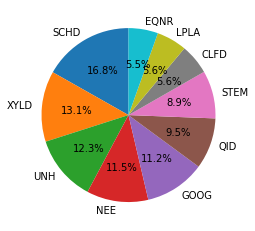

In [62]:
def portfolio_plt(pf):
    pf=pf.sort_values("HOLDQUANTITY",ascending=False)
    pf_plot=plt.pie(pf["HOLDQUANTITY"],labels=pf.index,autopct='%.1f%%',startangle=90)    
    return(plt.show(pf_plot))
portfolio_plt(pf) 

In [66]:
def holds_dataframing(company,date): #수익률 데이터화
    data_yf=yf.download(name,start='2022-01-01',end=date,progress=False)
    recent_price=data_yf['Adj Close'].iloc[-1]
    data=(recent_price/pf['PRICE']-1)*100)
    df=data.sort_values(ascending=False)
    return(df)

holds_dataframing(name,date) #회사 리스트,날짜

SyntaxError: ignored

## TICKER SEARCH

In [69]:
# ['가정용품', '개인, 가정 용품 및 서비스', '건설 및 엔지니어링', '건설장비 및 대형차, 기차, 배',
# '건축 자재', '교육서비스', '기타 금융업', '다양한 금융서비스', '다양한 산업재 도매업', '다양한 소매업',
# '레저 상품', '메탈&마이닝', '미디어 및 출판', '반도체 및 반도체 장비', '보험', '복합 기업', '복합 유틸리티', '부동산 운영 관리',
# '비즈니스교육', '사무기기', '생명과학 및 메디컬 리서치', '석유', '섬유 및 의류', '소프트웨어 및 IT서비스', '수도 유틸리티',
# '식품 및 담배', '식품 및 약품소매', '오일 및 가스', '오일 및 가스 장비 및 서비스', '용기 및 포장', '우라늄', '우주항공 및 국방',
# '운송 인프라', '운송업', '은행', '음료', '자동차 및 자동차 부품', '재생에너지', '전기 유틸리티', '전문 및 상업 서비스', '전문품 상점',
# '전자 장비 및 부품', '제약', '종이 및 임산물', '주택 및 상업용 리츠', '주택건설', '천연가스 유틸리티', '커뮤니케이션 및 네트워킹',
# '컴퓨터, 전화 및 가전제품', '통신 서비스', '통합 하드웨어 및 소프트웨어', '투자은행 및 서비스', '핀테크', '학교',
# '헬스케어 업체 및 서비스', '헬스케어 장비 및 용품', '호텔 및 엔터테인먼트', '화물 및 물류 서비스', '화학']

date_start='2022-08-01'
def ticker_search(index,sector):
    global tf
    data_fdr = fdr.StockListing(index)
    data_fdr = dict(list(data_fdr.groupby('Industry')))
    tickers=list(data_fdr[sector]['Symbol'].values)
    downloadf=yf.download(tickers,start=date_start,end=date,progress=False)
    downloadf=downloadf['Adj Close'].iloc[-1]-downloadf['Adj Close'].iloc[0]
    tf=pd.Series(downloadf)
    tf=tf.sort_values(ascending=False)
    # tf.to_excel(excel_writer="./data/%s_PROFIT_%s.xlsx"%(index,sector))
    return(tf)
ticker_search('NYSE','커뮤니케이션 및 네트워킹')

100%|██████████| 3396/3396 [00:11<00:00, 295.87it/s]


MSI      7.14
UI       6.66
VVNT     1.75
AVYA     0.89
JNPR     0.23
ADT     -0.04
EGHT    -0.29
NOK     -0.30
ANET    -0.31
BKSY    -0.49
CALX    -0.75
AEVA    -1.11
BDC     -1.32
MAXR    -4.89
CIEN    -7.52
GRMN    -9.76
ALLE   -10.48
dtype: float64

In [68]:
tf[:15]

BHC     1.86
RDY     0.48
LCI    -0.07
GLS    -0.22
TEVA   -0.64
TAK    -0.74
AMRX   -1.34
MRK    -2.30
OGN    -3.05
ABBV   -3.94
TARO   -4.03
ELAN   -4.25
PFE    -4.91
BMY    -5.01
PRGO   -5.59
dtype: float64

## FINANCIALS COMPARISON

In [71]:
holding=['NEE','STEM','GOOG','EQNR','UNH','CLFD','LPLA']
view=['EQNR','LPLA','STEM','CLFD']
finan=[]

def financial_shape(ticker):
    ticker_yf=yf.Ticker(ticker)
    info=ticker_yf.info
    if "trailingPE" in info:
        finan.append([info["trailingPE"], info["forwardPE"], info["priceToBook"],
                      info["pegRatio"], info["returnOnEquity"],info["shortPercentOfFloat"],
                      info["quickRatio"]])
    else:
        finan.append(["NaN", info["forwardPE"], info["priceToBook"],
                      info["pegRatio"], info["returnOnEquity"], info["shortPercentOfFloat"],
                      info["quickRatio"]])

def financial_comparison(tickerlist):
    for i in tickerlist: 
        financial_shape(i)
    df=pd.DataFrame(data=finan,
                    index=tickerlist,
                    columns=['PER', 'FPER', 'PBR',
                             'PEGR', 'ROE', 'short%', 'qRatio'])
    df=df.sort_values('FPER',ascending=False)
    return df

financial_comparison(view)


,PER,FPER,PBR,PEGR,ROE,short%,qRatio
CLFD,33.27,28.35,10.05,NaN,0.34,0.07,1.62
LPLA,35.42,13.20,9.50,1.02,0.30,0.03,2.94
EQNR,7.73,8.27,3.01,NaN,0.42,NaN,1.29
STEM,13.00,-44.28,3.62,NaN,0.05,0.09,1.91


## FINANCIALS VISUALIZATION

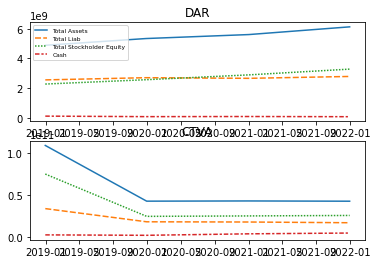

In [ ]:
def plt_earning(tickerlist):
    fig, axs = plt.subplots(len(tickerlist))
    for i in range(0,len(tickerlist)):
        #get datas for balance sheet
        ticker_yf=yf.Ticker(tickerlist[i])
        earning=ticker_yf.earnings
        #plotting
        sns.lineplot(data=earning,ax=axs[i],legend=False)
        if i==0:
            axs[i].legend(["Revenue","Earnings"],
                          loc=2,
                          prop={'size': 6})
        axs[i].set_title(tickerlist[i])
    plt.show()

def plt_balance(tickerlist):
    fig, axs = plt.subplots(len(tickerlist))
    for i in range(0,len(tickerlist)):
        #get datas for balance sheet
        ticker_yf=yf.Ticker(tickerlist[i])
        balance=ticker_yf.balance_sheet.loc[["Total Assets","Total Liab","Total Stockholder Equity","Cash"]]
        balance=balance.transpose().sort_index()
        #plotting
        sns.lineplot(data=balance,ax=axs[i],legend=False)
        if i==0:
            axs[i].legend(["Total Assets","Total Liab","Total Stockholder Equity","Cash"],
                          loc=2,
                          prop={'size': 6})
        axs[i].set_title(tickerlist[i])
    plt.show()

def plt_cashflow(tickerlist):
    fig, axs = plt.subplots(len(tickerlist))
    for i in range(0,len(tickerlist)):
        #get datas for balance sheet
        ticker_yf=yf.Ticker(tickerlist[i])
        cashflow=ticker_yf.cashflow.loc[["Total Cash From Operating Activities",
                                         "Total Cashflows From Investing Activities",
                                         "Total Cash From Financing Activities"]]
        cashflow=cashflow.transpose().sort_index()
        sns.lineplot(data=cashflow,ax=axs[i],legend=False)
        if i==0:
            axs[i].legend(["Total Cash From Operating Activities",
                           "Total Cashflows From Investing Activities",
                           "Total Cash From Financing Activities"],
                          loc=2,
                          prop={'size': 6})
        axs[i].set_title(tickerlist[i])
    plt.show()

# plt_earning(view)
plt_balance(view)
# plt_cashflow(view)